In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/My Drive/Colab Notebooks/vicohub"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os 
path = "gdrive/My Drive/Colab Notebooks/vicohub"
print(os.path.isdir(path))
print(os.path.isfile(path + "/Data set/train_happy.h5"))
print(os.path.isfile(path + "/Data set/test_happy.h5"))

True
True
True


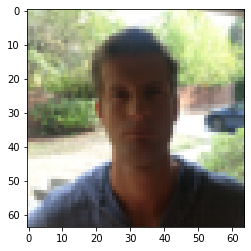

In [44]:
import h5py
import numpy as np
# path of data
TRAINING_DATA_PATH = path + "/Data set/train_happy.h5"
TEST_DATA_PATH = path  +  "/Data set/test_happy.h5"

def load_dataset():
    train_data = h5py.File(TRAINING_DATA_PATH, "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File(TEST_DATA_PATH, "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

X_train, y_train, X_test, y_test = load_dataset()


#data scalling
X_train = X_train/255.
X_test = X_test/255.
y_train = y_train.T
y_test = y_test.T

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(X_test[149])

In [0]:
#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [5]:
##  shape of testset
print("shape of X_test")
print(X_test.shape)
print(y_test.shape)
print("shpae of X_train")
print(X_train.shape)
print(y_train.shape)

shape of X_test
(150, 64, 64, 3)
(150, 1)
shpae of X_train
(600, 64, 64, 3)
(600, 1)


In [2]:
import numpy

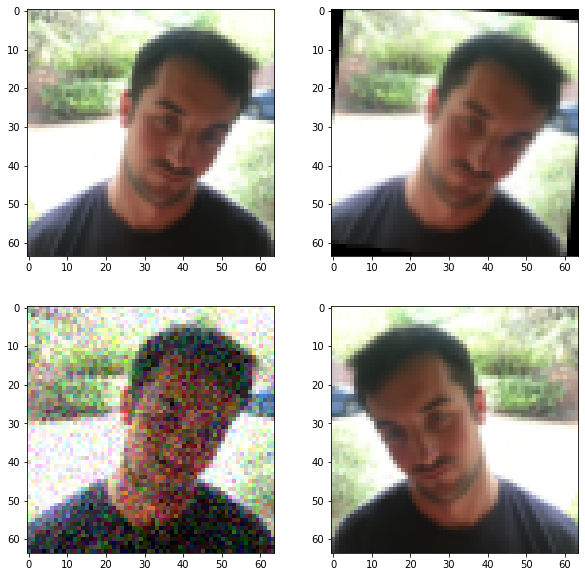

In [15]:
import random
from scipy import ndarray

import skimage as sk
from skimage import transform
from skimage import util
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)
    

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

#%%

# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip}

img = X_train[0]
transformed_image_rotate = available_transformations['rotate'](img)
transformed_image_noise = available_transformations['noise'](img)
transformed_image_horizontal_flip = available_transformations['horizontal_flip'](img)

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.figure(figsize=(10,10))
sp = plt.subplot(221)
plt.imshow(img)
sp = plt.subplot(222)
plt.imshow(transformed_image_rotate)
sp = plt.subplot(223)
plt.imshow(transformed_image_noise)
sp = plt.subplot(224)
plt.imshow(transformed_image_horizontal_flip)
plt.show()

In [0]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

In [0]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

In [17]:
import random
idx = random.randint(0,1000)
idx
X_train

array([[[[0.69803922, 0.74509804, 0.63921569],
         [0.6745098 , 0.70980392, 0.67843137],
         [0.7372549 , 0.76862745, 0.72156863],
         ...,
         [1.        , 1.        , 0.99607843],
         [0.99607843, 1.        , 0.98039216],
         [0.97647059, 0.99215686, 0.87058824]],

        [[0.72156863, 0.78823529, 0.64705882],
         [0.58431373, 0.60392157, 0.55686275],
         [0.58431373, 0.61960784, 0.54509804],
         ...,
         [1.        , 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98039216],
         [0.98431373, 1.        , 0.90196078]],

        [[0.77647059, 0.81176471, 0.64705882],
         [0.55294118, 0.57647059, 0.50196078],
         [0.65882353, 0.72156863, 0.60392157],
         ...,
         [0.99215686, 1.        , 0.95686275],
         [0.99607843, 1.        , 0.97254902],
         [0.99215686, 1.        , 0.91372549]],

        ...,

        [[0.30196078, 0.32156863, 0.34901961],
         [0.23529412, 0.25098039, 0.26666667]

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger

#%%

# Hyperparams
IMAGE_SIZE = 64
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE

In [0]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [109]:
# Model 
model = Sequential()

model.add(Conv2D(30, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(30, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(35, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(35, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(40, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(40, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(40, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(40, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

# model.compile(optimizer='adam',
#              loss=tf.keras.losses.sparse_categorical_crossentropy,
#              metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), input_shape=(64, 64, 3..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(35, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(35, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 

In [94]:
  model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 64, 64, 30)        840       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 64, 64, 30)        8130      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 32, 32, 30)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 32, 32, 35)        9485      
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 32, 32, 35)        11060     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 35)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 16, 16, 40)      

In [111]:
history = model.fit(X_train, y_train,
                    batch_size=7,
                    epochs=15,
                    validation_data=(X_valid, y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")
  
## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Accuracy trên tập test:  %.2f " %test_acc)

Train on 437 samples, validate on 49 samples
Epoch 1/15
437/437 [==============================] - 1s 2ms/step - loss: 0.4090 - acc: 0.8101 - val_loss: 0.2874 - val_acc: 0.8571
Epoch 2/15
437/437 [==============================] - 1s 2ms/step - loss: 0.3494 - acc: 0.8421 - val_loss: 0.3551 - val_acc: 0.8367
Epoch 3/15
437/437 [==============================] - 1s 2ms/step - loss: 0.3289 - acc: 0.8535 - val_loss: 0.2219 - val_acc: 0.8776
Epoch 4/15
437/437 [==============================] - 1s 2ms/step - loss: 0.3035 - acc: 0.8787 - val_loss: 0.1818 - val_acc: 0.9184
Epoch 5/15
437/437 [==============================] - 1s 2ms/step - loss: 0.2529 - acc: 0.8924 - val_loss: 0.1087 - val_acc: 0.9796
Epoch 6/15
437/437 [==============================] - 1s 2ms/step - loss: 0.2204 - acc: 0.9062 - val_loss: 0.1118 - val_acc: 0.9184
Epoch 7/15
437/437 [==============================] - 1s 2ms/step - loss: 0.2067 - acc: 0.9199 - val_loss: 0.1421 - val_acc: 0.9184
Epoch 8/15
437/437 [===========

NameError: name 'a' is not defined